Import libraries

In [81]:
#Data wrangling
import pandas as pd 

#Linear Algebra
import numpy as np 


#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [82]:
path = 'Datasets/obesity/data.csv'

In [83]:
rawdata = pd.read_csv(path)

In [84]:
rawdata.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


Data is not analytics-friendly, or anything data science-friendly, for that matter. First thing that must be done is transform it into a more computer-friendly  format, from wide-format to long-format. To do so, the **pandas function: melt()** will come in real handy.

In [85]:
#Rename that first column as 'Country'
rawdata.rename(columns = {'Unnamed: 0': 'Country'}, inplace = True)

To use the *melt()* function, it is necessary to state which column will be the one to be used as identifier variable. In this case, it will be de *Country* column, since it will be the one that identifies each entry's country. Following, there will have to be a variable specified, which will be the year in the *var_name* variable and, finally, the values will be the obesity index of each country, which will be named in the *value_name* variable.

In [86]:
#Use the *melt()* function to convert the format
ndf = rawdata.melt('Country', var_name = 'Year', value_name = 'Obesity (%)')

In [87]:
ndf

,Country,Year,Obesity (%)
0,NaN,2016,"Prevalence of obesity among adults, BMI &Great..."
1,NaN,2016,18+ years
2,Country,2016,Both sexes
3,Afghanistan,2016,5.5 [3.4-8.1]
4,Albania,2016,21.7 [17.0-26.7]
...,...,...,...
24943,Venezuela (Bolivarian Republic of),1975.2,13.2 [7.1-20.7]
24944,Viet Nam,1975.2,0.2 [0.1-0.5]
24945,Yemen,1975.2,4.2 [1.5-8.9]
24946,Zambia,1975.2,2.5 [1.0-5.1]


Now, the dataset is taking a better shape to perform analysis with. However, the *Obesity(%)* column is, still, not as clean as it should.

#### Sex Column

Now that I have your attention, the transformation carried out will be on the *Year* column. Notice that the values in this column follow this format:

- 1975: for the average obesity of Both sexes
- 1975.1: for the average obesity of all male individuals
- 1975.2: for the average obesity of all female individuals

The objective is to create a column in this dataframe that holds the gender information:

- Both Sexes
- Male
- Female

The *Sex* column will be created from the decimal numbers that are present in the *Year* column as seen above. However, since there are no number for the *Both Sexes* value, the cells representing them will hold a "None" value. That will be addressed as well.

In [89]:
ndf[['Year', 'Sex']] = ndf['Year'].str.split('.', expand = True)

In [90]:
ndf

,Country,Year,Obesity (%),Sex
0,NaN,2016,"Prevalence of obesity among adults, BMI &Great...",None
1,NaN,2016,18+ years,None
2,Country,2016,Both sexes,None
3,Afghanistan,2016,5.5 [3.4-8.1],None
4,Albania,2016,21.7 [17.0-26.7],None
...,...,...,...,...
24943,Venezuela (Bolivarian Republic of),1975,13.2 [7.1-20.7],2
24944,Viet Nam,1975,0.2 [0.1-0.5],2
24945,Yemen,1975,4.2 [1.5-8.9],2
24946,Zambia,1975,2.5 [1.0-5.1],2


Since the first 3 rows hold no real information, they can be dropped.

In [91]:
ndf.drop([0,1,2], inplace = True)

#### Obesity Column

Looking at the obesity column, it needs to be transformed into values that can be worked with.

In [92]:
ndf['Obesity (%)'].value_counts()

No data                                                                                      504
18+  years                                                                                   125
Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)    125
0.4 [0.1-1.0]                                                                                 55
0.6 [0.2-1.3]                                                                                 47
                                                                                            ... 
37.0 [30.0-43.8]                                                                               1
13.9 [9.7-19.1]                                                                                1
13.5 [10.0-17.4]                                                                               1
11.9 [8.5-15.8]                                                                                1
14.7 [9.3-21.4]               

First of all, the simplest thing to do is to generate a new dataframe leaving out one of the values that we do not want.

In [93]:
ndf2 = ndf[ndf['Obesity (%)'] != 'No data']

In [94]:
ndf2['Obesity (%)'].value_counts()

Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)    125
18+  years                                                                                   125
0.4 [0.1-1.0]                                                                                 55
0.6 [0.2-1.3]                                                                                 47
0.3 [0.1-0.8]                                                                                 46
                                                                                            ... 
37.0 [30.0-43.8]                                                                               1
13.9 [9.7-19.1]                                                                                1
13.5 [10.0-17.4]                                                                               1
11.9 [8.5-15.8]                                                                                1
14.7 [9.3-21.4]               

 Now, we generate a new column from the first element of the *Obesity (%)* column after splitting in the blank spaces.

In [95]:
ndf2['Obesity'] = ndf2['Obesity (%)'].apply(lambda bmi : bmi.split(" ")[0])

C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
#Discard the "Prevalence" values
ndf3 = ndf2[ndf2['Obesity'] != 'Prevalence']

In [97]:
#Map all the 1's and 2's to Male and Female 
ndf3['Sex'] = ndf3['Sex'].map( {'1':'Male', '2':'Female'})

C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


As previously stated, the null values in the Sex column belong to the *Both Sexes* value. To fix it, we just fill those cells with the proper value.

In [99]:
ndf3['Sex'] = ndf3['Sex'].fillna('Both Sexes')

C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
ndf3.Sex.value_counts()

Female        8064
Male          8064
Both Sexes    8063
Name: Sex, dtype: int64

Check once more for null values

In [100]:
ndf3.isna().sum()

Country        125
Year             0
Obesity (%)      0
Sex              0
Obesity          0
dtype: int64

There are 125 countries with null values, there is no value to replace them with, so the best thing is to just drop those entries.

In [101]:
ndf3.dropna(inplace = True)

C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
ndf3

,Country,Year,Obesity (%),Sex,Obesity
3,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,5.5
4,Albania,2016,21.7 [17.0-26.7],Both Sexes,21.7
5,Algeria,2016,27.4 [22.5-32.7],Both Sexes,27.4
6,Andorra,2016,25.6 [20.1-31.3],Both Sexes,25.6
7,Angola,2016,8.2 [5.1-12.2],Both Sexes,8.2
...,...,...,...,...,...
24943,Venezuela (Bolivarian Republic of),1975,13.2 [7.1-20.7],Female,13.2
24944,Viet Nam,1975,0.2 [0.1-0.5],Female,0.2
24945,Yemen,1975,4.2 [1.5-8.9],Female,4.2
24946,Zambia,1975,2.5 [1.0-5.1],Female,2.5


We check if there are any more *Country* entries that have *Country* as their value.

In [207]:
ndf3[ndf3['Country']=='Country']

,Country,Year,Obesity (%),Sex,Obesity
200,Country,2016,Male,Male,Male
398,Country,2016,Female,Female,Female
596,Country,2015,Both sexes,Both Sexes,Both
794,Country,2015,Male,Male,Male
992,Country,2015,Female,Female,Female
...,...,...,...,...,...
23960,Country,1976,Male,Male,Male
24158,Country,1976,Female,Female,Female
24356,Country,1975,Both sexes,Both Sexes,Both
24554,Country,1975,Male,Male,Male


Those values have to be erased

In [103]:
ndf4 = ndf3[ndf3['Country']!='Country']

In [104]:
#Reset index
ndf4.reset_index(inplace = True)

In [105]:
#Drop the index column
del ndf4['index']

In [106]:
ndf4

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,5.5
1,Albania,2016,21.7 [17.0-26.7],Both Sexes,21.7
2,Algeria,2016,27.4 [22.5-32.7],Both Sexes,27.4
3,Andorra,2016,25.6 [20.1-31.3],Both Sexes,25.6
4,Angola,2016,8.2 [5.1-12.2],Both Sexes,8.2
...,...,...,...,...,...
24061,Venezuela (Bolivarian Republic of),1975,13.2 [7.1-20.7],Female,13.2
24062,Viet Nam,1975,0.2 [0.1-0.5],Female,0.2
24063,Yemen,1975,4.2 [1.5-8.9],Female,4.2
24064,Zambia,1975,2.5 [1.0-5.1],Female,2.5


In [107]:
ndf4.describe().transpose()

,count,unique,top,freq
Country,24066,191,New Zealand,126
Year,24066,42,2007,573
Obesity (%),24066,16374,0.4 [0.1-1.0],55
Sex,24066,3,Both Sexes,8022
Obesity,24066,601,0.4,222


Since the describe() method did not return any statistics, there are no numerical columns in the data frame

In [108]:
ndf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24066 non-null  object
 1   Year         24066 non-null  object
 2   Obesity (%)  24066 non-null  object
 3   Sex          24066 non-null  object
 4   Obesity      24066 non-null  object
dtypes: object(5)
memory usage: 940.2+ KB


We need to change the data type to datetime for the Year column and to float for the Obesity Column

In [109]:
ndf4 = ndf4.astype({'Obesity': float})

In [110]:
ndf4['Year'] = pd.to_datetime(ndf4['Year'])

In [111]:
#We just take the year
ndf4['Year'] = ndf4['Year'].apply(lambda date : date.year)

In [112]:
ndf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  int64  
 2   Obesity (%)  24066 non-null  object 
 3   Sex          24066 non-null  object 
 4   Obesity      24066 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 940.2+ KB


Now the data is ready to perform visualizations

# EDA

A good and straight visualization to give context is to visualize the evolution of all data with respect to time. More specifically, the average obesity in all countries, by year and gender.

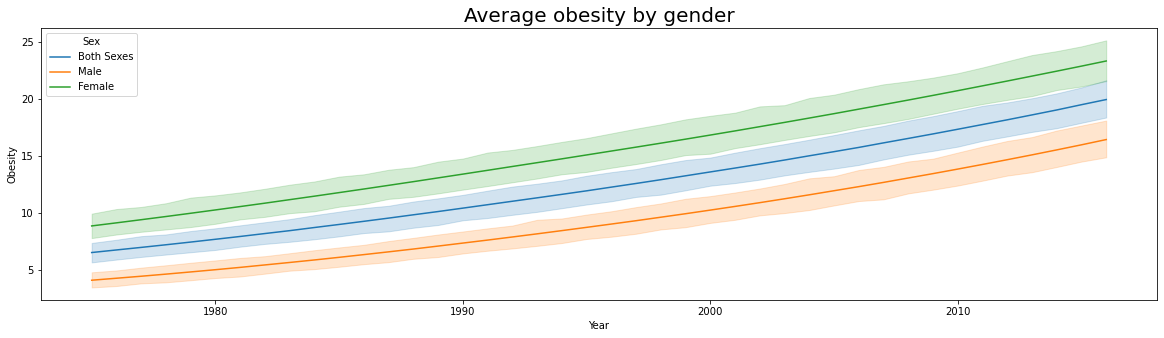

In [203]:
plt.figure(figsize = (20,5))

sns.lineplot(x = 'Year', y = 'Obesity', data = ndf4, hue = 'Sex')
plt.title('Average obesity by gender', size = 20)
plt.show()

I want to compare the distribution of each gender in front of the other through time. To do so, I have decided to compare the starting and ending time periods with an intermediate point.

Time periods to explore:

- 1975
- 1994
- 2016


The intermediate period has been chosen arbitrarely

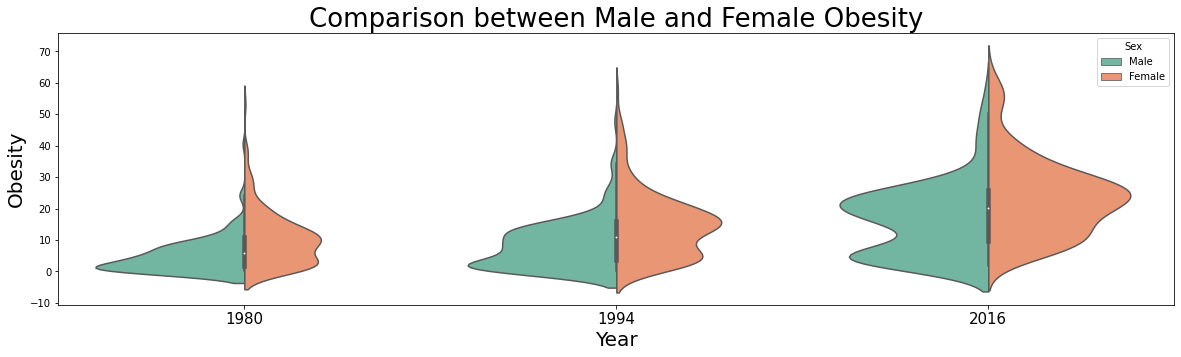

In [114]:
plt.figure(figsize = (20, 5))

data_4_plot = ndf4[(ndf4.Sex!='Both Sexes')&ndf4.Year.isin([1980,1994,2016])]

sns.violinplot(x = 'Year', y = 'Obesity', hue = 'Sex', data = data_4_plot,
              split = True, palette = "Set2")
plt.title("Comparison between Male and Female Obesity", size = 26)

plt.ylabel('Obesity', size = 20)


plt.xlabel('Year', size = 20)
plt.xticks(size = 15)

plt.show()

Now, these two visualizations provide a good insight on the trend that obesity has been following for the past 40 years, as well as on how obesity distributes over the genders.

Nonetheless, a drawback to this information is that we do not get the insight on the most obese countries. And even if we did, perhaps a more interesting data would be if those countries have had their obesity indicators grow over time. So, next step, find the countries that have had the greatest growth.

# Countries with the greatest growth?

How can we find them? Well, first it is necessary to define *growth*. We will define it as the difference between a starting point and an end point. Whether the country has experienced growth or not will be given to us by the resulting sign.

We define a function to compute it for every country that we pass

In [157]:
def growth(data, country, start, end):
    
    data = data[data['Country'] == country]
    
    start_data = data[(data['Year']==start)&(data['Sex'] == 'Both Sexes')]['Obesity'].values
    end_data = data[(data['Year'] == end)&(data['Sex'] == 'Both Sexes')]['Obesity'].values
    
    growth = end_data-start_data
    
    
    
    
    return growth    

With it we will build a dictionary with the countries as keys and their obesity as value.

In [158]:
growth_df = {country:growth(ndf4,country,1975,2016) for country in ndf4['Country']}

In [166]:
#Generate a Dataframe from it
g_df = pd.DataFrame(growth_df).transpose()

In [173]:
#Rename the column to a more descriptive name
g_df.rename(columns = {0:'Obesity Growth'}, inplace = True)

In [175]:
#Sort the values 
g_df.sort_values('Obesity Growth', inplace = True, ascending = False)

In [191]:
#reset Index to be able to access the countries of interest in the visualizations
g_df.reset_index(inplace = True)

#Rename the column to countries
g_df.rename(columns = {'index':'Countries'}, inplace = True)

In [200]:
#Change a string that was too long 
g_df.Countries = g_df.Countries.str.replace('Federated States of', 'FSo')

### Visualizations

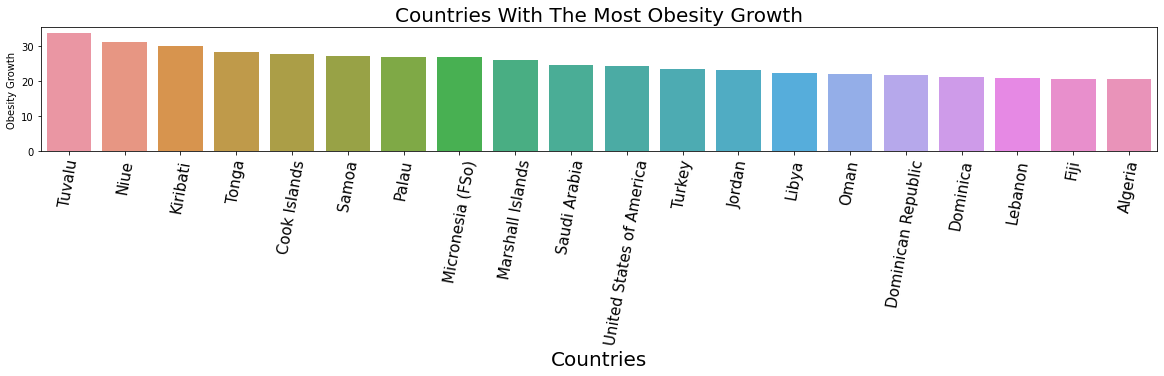

In [202]:
#lets see the highest 20


fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(211)
sns.barplot(x = 'Countries',y = 'Obesity Growth',data = g_df.iloc[:20].reset_index(), ax = ax)
plt.xticks(rotation = 80, size = 15)
plt.xlabel('Countries', size = 20)

plt.title('Countries With The Most Obesity Growth', size = 20)


plt.show()

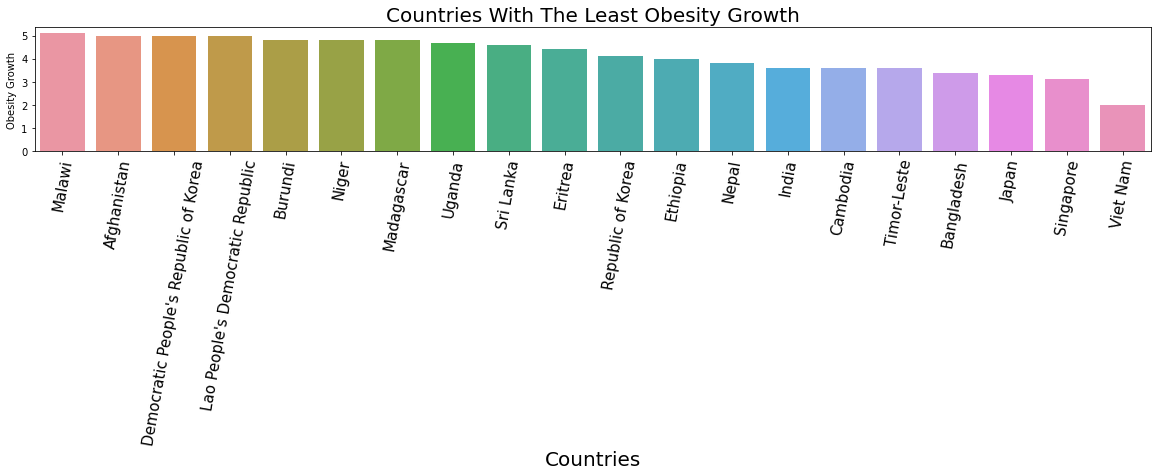

In [204]:
#And now the lowest 20


fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(211)
sns.barplot(x = 'Countries',y = 'Obesity Growth',data = g_df.iloc[-20:].reset_index(), ax = ax)
plt.xticks(rotation = 80, size = 15)

plt.xlabel('Countries', size = 20)

plt.title('Countries With The Least Obesity Growth', size = 20)


plt.show()

With the data we have there's not much explanation as to why these countries are the most obese in the world. However, with a quick search, it can be stated that population-wise they're not the same. Lets compare Tuvalu and Vietnam

Population:

    - Tuvalu: 11.508 
    
    - Vietnam: 95.54 millions 
    
    
Source: World Bank

A good idea would be to add a column with each country's population in order to be able to draw a more realistic comparison among them all.